<a href="https://colab.research.google.com/github/ruby0322/bda-midterm-project/blob/trending/bda_midterm_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 環境設定及整合


### Python 套件導入

In [ ]:
import os
import pandas as pd
import chardet
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

In [ ]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cuda:0'

### 資料集下載及讀取

In [ ]:
!gdown 1jJGJjXcQqRaAWBoHB4hf0PT-OH4vRvvM

Downloading...
From (original): https://drive.google.com/uc?id=1jJGJjXcQqRaAWBoHB4hf0PT-OH4vRvvM
From (redirected): https://drive.google.com/uc?id=1jJGJjXcQqRaAWBoHB4hf0PT-OH4vRvvM&confirm=t&uuid=2d8eca54-a7d7-4e5c-aed2-328a3f7c09a0
To: /content/BDA.zip
100% 470M/470M [00:01<00:00, 255MB/s]


In [ ]:
!unzip -P bda2024 ./BDA.zip
!mkdir ./data
!mv ./*.csv ./data

Archive:  ./BDA.zip
  inflating: bda2024_202203-202402_內容數據_新聞1.csv  
  inflating: bda2024_202203-202402_內容數據_新聞2.csv  
  inflating: bda2024_202203-202402_內容數據_新聞3.csv  
  inflating: bda2024_202203-202402_討論數據_dcard.csv  
  inflating: bda2024_202203-202402_討論數據_mobile01-1.csv  
  inflating: bda2024_202203-202402_討論數據_mobile01-2.csv  
  inflating: bda2024_202203-202402_討論數據_ptt.csv  
  inflating: bda2024_微股力_個股交易數據-2年.csv  
  inflating: bda2024_微股力_社群PKTD-2年.csv  
  inflating: bda2024_微股力_籌碼數據-2年.csv  
  inflating: bda2024_微股力_財報數據-2年.csv  


In [ ]:
root = '/content/data'
data = {}
for filename in os.listdir(root):
    words = filename.split('_')
    readable_filename = ''.join(words[-2:])
    filepath = f'{root}/{filename}'
    print(f'正在載入 {readable_filename} ...')
    df = pd.read_csv(filepath, encoding='utf-8')
    print(df)
    data[readable_filename[:-4]] = df
    print(f'成功載入 {readable_filename}。')

正在載入 討論數據mobile01-1.csv ...
                      id p_type                       s_name s_area_name  \
0      1646064067927_F01  forum  Mobile01 (收錄 2022/10/1 前資料)    閒聊_投資與理財   
1      1646064904494_F01  forum  Mobile01 (收錄 2022/10/1 前資料)    閒聊_投資與理財   
2      1646065944204_F01  forum  Mobile01 (收錄 2022/10/1 前資料)    閒聊_投資與理財   
3      1646065948264_F01  forum  Mobile01 (收錄 2022/10/1 前資料)    閒聊_投資與理財   
4      1646065945036_F01  forum  Mobile01 (收錄 2022/10/1 前資料)    閒聊_投資與理財   
...                  ...    ...                          ...         ...   
48720  1664526699462_F01  forum  Mobile01 (收錄 2022/10/1 前資料)    閒聊_投資與理財   
48721  1664531687244_F01  forum  Mobile01 (收錄 2022/10/1 前資料)    閒聊_投資與理財   
48722  1664531687277_F01  forum  Mobile01 (收錄 2022/10/1 前資料)    閒聊_投資與理財   
48723  1664534412587_F01  forum  Mobile01 (收錄 2022/10/1 前資料)    閒聊_投資與理財   
48724  1664546616120_F01  forum  Mobile01 (收錄 2022/10/1 前資料)    閒聊_投資與理財   

                     post_time                            t

<ipython-input-5-18a6a9e52baa>:8: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath, encoding='utf-8')


        stock_name stock_symbol   open   high    low  close  volume  \
0               日馳         1526  47.55  48.45  47.55  48.30     138   
1               日馳         1526  48.30  48.30  47.40  47.95     153   
2               日馳         1526  48.45  48.70  47.80  48.10     120   
3               日馳         1526  47.95  47.95  47.55  47.60     165   
4               日馳         1526  47.65  47.65  45.30  45.65     514   
...            ...          ...    ...    ...    ...    ...     ...   
1154220         統一         1216  76.20  78.60  76.00  77.20   20607   
1154221         統一         1216  76.80  78.80  76.40  78.80   16466   
1154222         統一         1216  78.00  78.70  77.10  78.20   16015   
1154223         統一         1216  78.00  78.00  76.30  77.40    8524   
1154224         統一         1216  76.10  77.20  75.80  76.20    8347   

                        date  
0        2022-03-01 00:00:00  
1        2022-03-02 00:00:00  
2        2022-03-03 00:00:00  
3        2022-03-04 00:

<ipython-input-5-18a6a9e52baa>:8: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath, encoding='utf-8')


In [ ]:
data.keys()

dict_keys(['討論數據mobile01-1', '討論數據ptt', '討論數據dcard', '討論數據mobile01-2', '微股力社群PKTD-2年', '內容數據新聞3', '內容數據新聞2', '微股力財報數據-2年', '內容數據新聞1', '微股力個股交易數據-2年', '微股力籌碼數據-2年'])

In [ ]:
df = data['微股力個股交易數據-2年']
grouped = df.groupby('stock_name')
dfs = {name: group for name, group in grouped}
for stock_name, stock_df in dfs.items():
  print(f"Dataframe for {stock_name}:")
  print(stock_df)
  print("\n")

串流輸出內容已截斷至最後 5000 行。
140465          銘鈺         4545  28.65  28.80  28.50  28.70      11   
140466          銘鈺         4545  28.70  28.70  28.35  28.65      16   
140467          銘鈺         4545  28.70  28.70  28.50  28.60       8   
140468          銘鈺         4545  29.20  29.20  28.70  28.85      15   
140469          銘鈺         4545  28.85  28.85  28.00  28.70      53   
...            ...          ...    ...    ...    ...    ...     ...   
1070047         銘鈺         4545  31.40  31.80  31.15  31.35     124   
1071805         銘鈺         4545  30.55  32.05  30.40  31.30     425   
1077847         銘鈺         4545  31.00  31.30  30.95  31.00      71   
1077965         銘鈺         4545  31.30  31.45  31.20  31.20      44   
1078028         銘鈺         4545  31.40  31.40  30.80  31.10      53   

                        date  
140465   2022-03-01 00:00:00  
140466   2022-03-02 00:00:00  
140467   2022-03-03 00:00:00  
140468   2022-03-04 00:00:00  
140469   2022-03-07 00:00:00  
...        

In [ ]:
inv_df = dfs['英業達']
inv_df

,stock_name,stock_symbol,open,high,low,close,volume,date
74379,英業達,2356,24.25,24.25,23.95,23.95,6753,2022-08-18 00:00:00
74380,英業達,2356,23.95,24.15,23.85,24.05,5813,2022-08-19 00:00:00
74381,英業達,2356,23.95,24.30,23.90,24.20,7375,2022-08-22 00:00:00
74382,英業達,2356,24.00,24.20,23.85,23.90,7125,2022-08-23 00:00:00
74383,英業達,2356,23.90,24.10,23.75,24.05,8519,2022-08-24 00:00:00
...,...,...,...,...,...,...,...,...
1070511,英業達,2356,56.20,57.20,56.20,56.60,27201,2024-02-21 00:00:00
1071896,英業達,2356,57.10,57.40,55.00,55.10,58259,2024-02-23 00:00:00
1073807,英業達,2356,57.90,58.50,56.30,56.30,71330,2024-02-22 00:00:00
1073966,英業達,2356,56.70,57.30,56.10,57.00,30040,2024-02-20 00:00:00


In [ ]:
inv_df = inv_df[['date', 'close']]
inv_df

,date,close
74379,2022-08-18 00:00:00,23.95
74380,2022-08-19 00:00:00,24.05
74381,2022-08-22 00:00:00,24.20
74382,2022-08-23 00:00:00,23.90
74383,2022-08-24 00:00:00,24.05
...,...,...
1070511,2024-02-21 00:00:00,56.60
1071896,2024-02-23 00:00:00,55.10
1073807,2024-02-22 00:00:00,56.30
1073966,2024-02-20 00:00:00,57.00


<ipython-input-10-530e562fc702>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inv_df['date'] = pd.to_datetime(inv_df['date'])


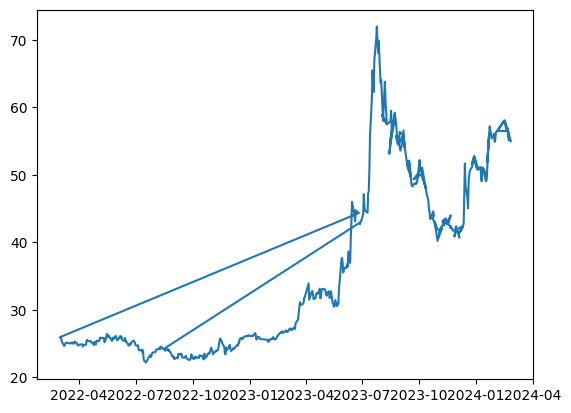

In [ ]:
inv_df['date'] = pd.to_datetime(inv_df['date'])
plt.plot(inv_df['date'], inv_df['close'])

In [ ]:
from copy import deepcopy as dc

def prepare_dataframe_for_lstm(df, n_steps):
    df = dc(df)

    df.set_index('date', inplace=True)

    for i in range(1, n_steps+1):
        df[f'Close(t-{i})'] = df['close'].shift(i)

    df.dropna(inplace=True)

    return df

lookback = 7
shifted_df = prepare_dataframe_for_lstm(inv_df, lookback)
shifted_df

,close,Close(t-1),Close(t-2),Close(t-3),Close(t-4),Close(t-5),Close(t-6),Close(t-7)
date,,,,,,,,
2022-08-29,23.20,23.75,23.80,24.05,23.90,24.20,24.05,23.95
2022-08-30,23.00,23.20,23.75,23.80,24.05,23.90,24.20,24.05
2022-08-31,23.15,23.00,23.20,23.75,23.80,24.05,23.90,24.20
2022-09-01,22.75,23.15,23.00,23.20,23.75,23.80,24.05,23.90
2022-09-02,22.70,22.75,23.15,23.00,23.20,23.75,23.80,24.05
...,...,...,...,...,...,...,...,...
2024-02-21,56.60,58.10,56.50,56.50,58.00,56.30,55.30,54.90
2024-02-23,55.10,56.60,58.10,56.50,56.50,58.00,56.30,55.30
2024-02-22,56.30,55.10,56.60,58.10,56.50,56.50,58.00,56.30


In [ ]:
shifted_df_as_np = shifted_df.to_numpy()

shifted_df_as_np

array([[23.2 , 23.75, 23.8 , ..., 24.2 , 24.05, 23.95],
       [23.  , 23.2 , 23.75, ..., 23.9 , 24.2 , 24.05],
       [23.15, 23.  , 23.2 , ..., 24.05, 23.9 , 24.2 ],
       ...,
       [56.3 , 55.1 , 56.6 , ..., 56.5 , 58.  , 56.3 ],
       [57.  , 56.3 , 55.1 , ..., 56.5 , 56.5 , 58.  ],
       [55.  , 57.  , 56.3 , ..., 58.1 , 56.5 , 56.5 ]])

In [ ]:
shifted_df_as_np.shape

(478, 8)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
shifted_df_as_np = scaler.fit_transform(shifted_df_as_np)

shifted_df_as_np

array([[-0.95983936, -0.937751  , -0.93574297, ..., -0.91967871,
        -0.92570281, -0.92971888],
       [-0.96787149, -0.95983936, -0.937751  , ..., -0.93172691,
        -0.91967871, -0.92570281],
       [-0.96184739, -0.96787149, -0.95983936, ..., -0.92570281,
        -0.93172691, -0.91967871],
       ...,
       [ 0.36947791,  0.32128514,  0.3815261 , ...,  0.37751004,
         0.437751  ,  0.36947791],
       [ 0.39759036,  0.36947791,  0.32128514, ...,  0.37751004,
         0.37751004,  0.437751  ],
       [ 0.31726908,  0.39759036,  0.36947791, ...,  0.44176707,
         0.37751004,  0.37751004]])

In [ ]:
X = shifted_df_as_np[:, 1:]
y = shifted_df_as_np[:, 0]

X.shape, y.shape

((478, 7), (478,))

In [ ]:
X = dc(np.flip(X, axis=1))
X

array([[-0.92971888, -0.92570281, -0.91967871, ..., -0.92570281,
        -0.93574297, -0.937751  ],
       [-0.92570281, -0.91967871, -0.93172691, ..., -0.93574297,
        -0.937751  , -0.95983936],
       [-0.91967871, -0.93172691, -0.92570281, ..., -0.937751  ,
        -0.95983936, -0.96787149],
       ...,
       [ 0.36947791,  0.437751  ,  0.37751004, ...,  0.44176707,
         0.3815261 ,  0.32128514],
       [ 0.437751  ,  0.37751004,  0.37751004, ...,  0.3815261 ,
         0.32128514,  0.36947791],
       [ 0.37751004,  0.37751004,  0.44176707, ...,  0.32128514,
         0.36947791,  0.39759036]])

In [ ]:
split_index = int(len(X) * 0.95)

split_index

454

In [ ]:
X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((454, 7), (24, 7), (454,), (24,))

In [ ]:
X_train = X_train.reshape((-1, lookback, 1))
X_test = X_test.reshape((-1, lookback, 1))

y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((454, 7, 1), (24, 7, 1), (454, 1), (24, 1))

In [ ]:
X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()
X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([454, 7, 1]),
 torch.Size([24, 7, 1]),
 torch.Size([454, 1]),
 torch.Size([24, 1]))

In [ ]:
from torch.utils.data import Dataset

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]

train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

In [ ]:
train_dataset

In [ ]:
from torch.utils.data import DataLoader

batch_size = 16

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([16, 7, 1]) torch.Size([16, 1])


In [ ]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers,
                            batch_first=True)

        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

model = LSTM(1, 4, 1)
model.to(device)
model

LSTM(
  (lstm): LSTM(1, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)

In [ ]:
def train_one_epoch():
    model.train(True)
    print(f'Epoch: {epoch + 1}')
    running_loss = 0.0

    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        output = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 100 == 99:  # print every 100 batches
            avg_loss_across_batches = running_loss / 100
            print('Batch {0}, Loss: {1:.3f}'.format(batch_index+1,
                                                    avg_loss_across_batches))
            running_loss = 0.0
    print()

In [ ]:
def validate_one_epoch():
    model.train(False)
    running_loss = 0.0

    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        with torch.no_grad():
            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()

    avg_loss_across_batches = running_loss / len(test_loader)

    print('Val Loss: {0:.3f}'.format(avg_loss_across_batches))
    print('***************************************************')
    print()

In [ ]:
learning_rate = 0.001
num_epochs = 10
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()

Epoch: 1

Val Loss: 0.174
***************************************************

Epoch: 2

Val Loss: 0.264
***************************************************

Epoch: 3

Val Loss: 0.414
***************************************************

Epoch: 4

Val Loss: 0.578
***************************************************

Epoch: 5

Val Loss: 0.588
***************************************************

Epoch: 6

Val Loss: 0.517
***************************************************

Epoch: 7

Val Loss: 0.406
***************************************************

Epoch: 8

Val Loss: 0.294
***************************************************

Epoch: 9

Val Loss: 0.194
***************************************************

Epoch: 10

Val Loss: 0.123
***************************************************



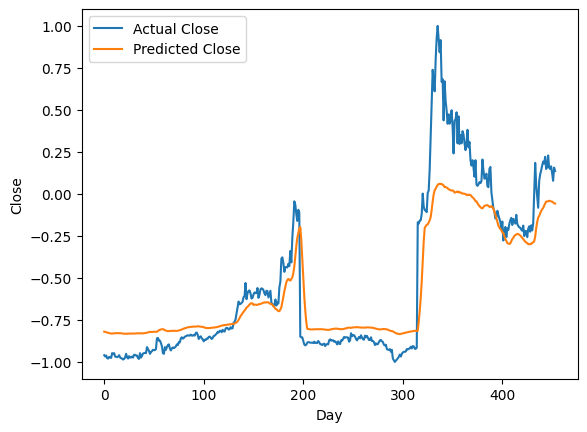

In [ ]:
with torch.no_grad():
    predicted = model(X_train.to(device)).to('cpu').numpy()

plt.plot(y_train, label='Actual Close')
plt.plot(predicted, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()

In [ ]:
train_predictions = predicted.flatten()

dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = train_predictions
dummies = scaler.inverse_transform(dummies)

train_predictions = dc(dummies[:, 0])
train_predictions

array([26.69063054, 26.64963965, 26.59896761, 26.56002188, 26.51175862,
       26.45934269, 26.43457214, 26.40622031, 26.39172456, 26.4233163 ,
       26.4371605 , 26.46580174, 26.46674566, 26.45867186, 26.45620816,
       26.46260784, 26.4583216 , 26.43725994, 26.40678281, 26.39337791,
       26.37539588, 26.36686347, 26.36739035, 26.39012464, 26.3896883 ,
       26.37874562, 26.39384691, 26.40223832, 26.40630194, 26.4139587 ,
       26.39527466, 26.41419171, 26.43741281, 26.44012585, 26.44902188,
       26.43612902, 26.41625172, 26.45331109, 26.43705364, 26.43161273,
       26.45210892, 26.47074843, 26.50075657, 26.52901787, 26.58103604,
       26.63061723, 26.6503654 , 26.63506969, 26.63776789, 26.65088485,
       26.67456307, 26.66155297, 26.65723407, 26.67037776, 26.79310852,
       26.89953139, 26.96035802, 27.01290307, 27.04733251, 27.05272   ,
       26.99597182, 26.88261201, 26.8420916 , 26.79232637, 26.76272489,
       26.76516632, 26.78659605, 26.80281787, 26.80596131, 26.79

In [ ]:
dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = y_train.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_train = dc(dummies[:, 0])
new_y_train

array([23.20000033, 22.99999997, 23.15000061, 22.74999989, 22.70000017,
       22.95000025, 22.84999933, 22.79999961, 23.50000014, 23.34999949,
       23.50000014, 22.99999997, 22.95000025, 22.90000053, 22.99999997,
       23.20000033, 22.84999933, 22.74999989, 22.70000017, 22.54999952,
       22.65000045, 22.84999933, 23.4000007 , 22.90000053, 22.70000017,
       23.04999969, 22.84999933, 22.84999933, 22.99999997, 22.84999933,
       23.25000005, 23.25000005, 23.15000061, 23.15000061, 22.74999989,
       22.65000045, 23.50000014, 22.84999933, 23.09999941, 23.45000042,
       23.50000014, 23.54999986, 23.50000014, 24.39999955, 24.09999974,
       23.84999966, 23.4000007 , 23.6499993 , 23.79999994, 24.0000003 ,
       23.95000058, 23.95000058, 24.09999974, 25.69999968, 25.7499994 ,
       25.35000016, 25.35000016, 25.00000064, 24.50000047, 23.50000014,
       23.4000007 , 24.39999955, 24.0000003 , 24.39999955, 24.69999935,
       24.80000027, 24.20000067, 23.89999938, 24.20000067, 24.34

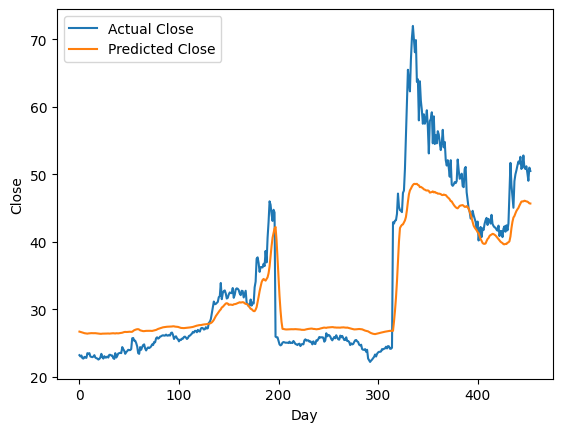

In [ ]:
plt.plot(new_y_train, label='Actual Close')
plt.plot(train_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()

In [ ]:
test_predictions = model(X_test.to(device)).detach().cpu().numpy().flatten()

dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = test_predictions
dummies = scaler.inverse_transform(dummies)

test_predictions = dc(dummies[:, 0])
test_predictions

array([45.61942005, 45.58202118, 45.62553662, 45.52238335, 45.44688417,
       45.86295571, 45.95893735, 46.38547084, 46.69717024, 46.90946989,
       47.03436498, 47.12121336, 47.1436262 , 47.12187381, 47.08600483,
       47.11439742, 47.22761972, 47.24947822, 47.26584846, 47.35261484,
       47.35166517, 47.27287227, 47.25938556, 47.27364719])

In [ ]:
dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = y_test.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_test = dc(dummies[:, 0])
new_y_test

array([50.10000007, 51.09999985, 49.05000002, 49.25000001, 55.99999985,
       51.89999982, 57.19999981, 56.50000002, 56.20000022, 55.40000025,
       55.80000023, 56.10000004, 54.90000008, 55.30000007, 56.29999966,
       57.99999978, 56.50000002, 56.50000002, 58.09999996, 56.6000002 ,
       55.0999997 , 56.29999966, 57.00000019, 55.00000026])

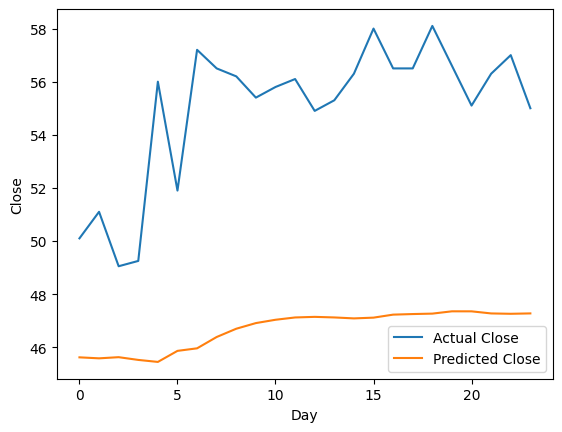

In [ ]:
plt.plot(new_y_test, label='Actual Close')
plt.plot(test_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()